## This script file is used to analysis Carseats.csv dataset.

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('data/Carseats.csv')
df = df.drop('index', axis=1)

In [29]:
description = df.describe()
print(description)

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

<b>(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.</b>

In [30]:
model = sm.OLS.from_formula('Sales ~ Price + Urban + US', df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           2.39e-23
Time:                        23:11:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

<b>(b) Provide an interpretation of each coefficient in the model. Be careful–some of the variables in the model are qualitative!</b>

1. When price increases by 1000 dollers and other predictors are held constant, sales decrease by 54.5 unit sales. In otherwords, when price increases by 1000 dollers, the number of carseats sold decrease by 54,500.
1. A store’s sale is not affected by whether or not it is in a Urban area.
1. A store in the US sales 1200 more carseats (in average) than a store that is abroad.

<b>(c) Write out the model in equation form, being careful to handle the qualitative variables properly.</b>

#### Sales=13.0435+(−0.0545)×Price+(−0.0219)×Urban+(1.2006)×US+ε
--with Urban=1 if the store is in an urban location and 0 if not, and US=1 if the store is in the US and 0 if not.

<b>(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?</b>

We can reject the null hypothesis for the “Price” and “US” variables. 

And the predictor ‘Urban’. Its p-value is not statistically significant with a value of 0.936.

<b>(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.</b>

In [31]:
model = sm.OLS.from_formula('Sales ~ Price + US', df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           2.66e-24
Time:                        23:11:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

<b>(f) How well do the models in (a) and (e) fit the data?</b>

Based on their respective R-square values(in summary tables), these two models are mediocre (only 24% change in response explained).

<b>(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).</b>

|   |0.025|0.975|
|---|---|---|
|Intercept|11.790|14.271|
|US[T.Yes]|0.692|1.708|
|Price|-0.065|-0.044|

<b>(h) Is there evidence of outliers or high leverage observations in the model from (e)?</b>

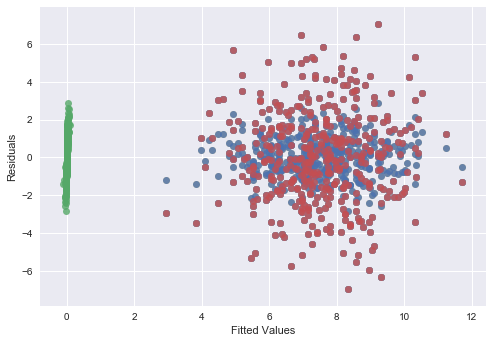

In [35]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)
plt.show()

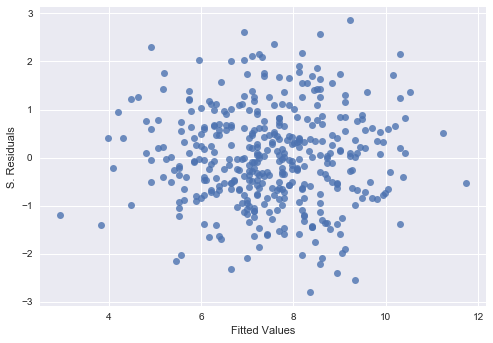

In [36]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)
plt.show()

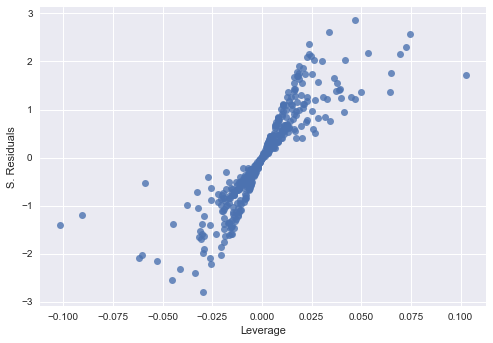

In [37]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)
plt.show()

The plot of standardized residuals versus leverage indicates the presence of a few outliers (higher than 2 or lower than -2) and some leverage points as some points exceed (p+1)/n(p+1)/n (0.01).